### Unidad 3, Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow. 19 de Abril 2024.

# Métodos numéricos: Derivadas

## Definición de Derivada
La derivada es la tasa de cambio de una función, que puede aproximarse numéricamente como la pendiente de la recta tangente a la misma en un punto. 

En general, se utilizan las siguientes tres:

$( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h})$

$( f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h})$

$( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h})$

### Implementación numérica de las derivadas de primer orden
Diferencia hacia adelante
$( f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n})$

Diferencia hacia atrás
$( f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}})$

Diferencia valor central
$( f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}})$

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.Ze2RAK0CmQB9THRzllOPCAHaEx%26pid%3DApi&f=1&ipt=53bec1288c3068e4e677b86ea820d0f88b7218666006936622dc0b859755b168&ipo=images" width="450" height="300">

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Para una función ejemplo
$f(x)=cos(x)x-\frac{1}{10}x$

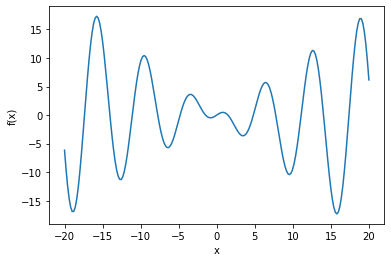

In [2]:
def f(x):
    return np.cos(x)*x - (1/10)*x

#creo una lista de valores x
x = np.linspace(-20,20,200)
y = f(x)

#ploteo la función
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)


Ahora, determino las derivadas  

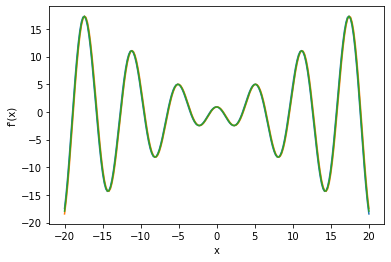

In [3]:
h = 0.1 #tiene que tender a cero
derivada_adelante = ( f(x+h) - f(x) ) / h
derivada_atras = ( f(x) - f(x-h) ) / h
derivada_central = ( f(x+h) - f(x-h) ) / (2*h)

#ploteo la función
plt.xlabel('x')
plt.ylabel('''f'(x)''')
plt.plot(x,derivada_adelante)
plt.plot(x,derivada_atras)
plt.plot(x,derivada_central)

### Bonus track

ahora quiero aproximar visualmente el error de los métodos, para ello  saco la derivada analítica
$ f'(x) = \cos \left(x\right)-x\sin \left(x\right)-\frac{1}{10}$

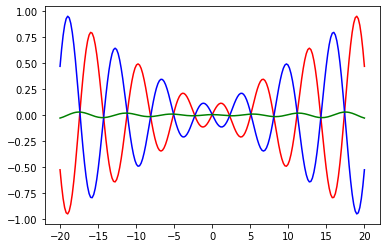

In [4]:
d_analitica = np.cos(x) - x* np.sin(x) - 1 /10
plt.plot(x, d_analitica - derivada_adelante,'red')
plt.plot(x, d_analitica - derivada_atras,'blue')
plt.plot(x, d_analitica - derivada_central,'green')
plt.xlabel('x')
plt.ylabel('diferencia respecto a derivada analítica')
plt.show()

### Machete que no mencioné en la clase 2 para trabajo con arreglos:

Numpy, obtener un vector con los índices corridos:

Se puede utilizar una función de numpy $np.roll(arreglo,step)$, donde el primer parametro es un arreglo y el segundo la cantidad de lugares que me gustaría mover el índice de un arreglo. (en número entero, positivo a la derecha, negativo a la izquierda).</br>

Por ejemplo


In [15]:
import numpy as np
h = 60
x = np.linspace(0,30,h+1)
print(x)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30. ]


In [11]:
x_f= np.roll(x,-1)
print(x_f)

[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.
 14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.
 21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.
 28.5 29.  29.5 30.   0. ]


como observan, el último índice queda con el valor que inicialmente esta en el primero, por lo tanto hay que pisarlo para que no rompa nuestros cálculos:

In [17]:
x_f[h] = x_f[h-1]

## Ahora si, hora de hacer el TP 2!!